# Lab 2: Probability, Distributions, and Statistical Questions

## Problem 1

In 1 day, the average cosmic-ray background is some number X (0.7 for me, 3.0 for Dan), and the average number of gamma-rays emitted by your hypothetical source is Y (I shall choose 5). 

### 1A. 
Show how the probability distribution of the background changes as you integrate (sum) for more days.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

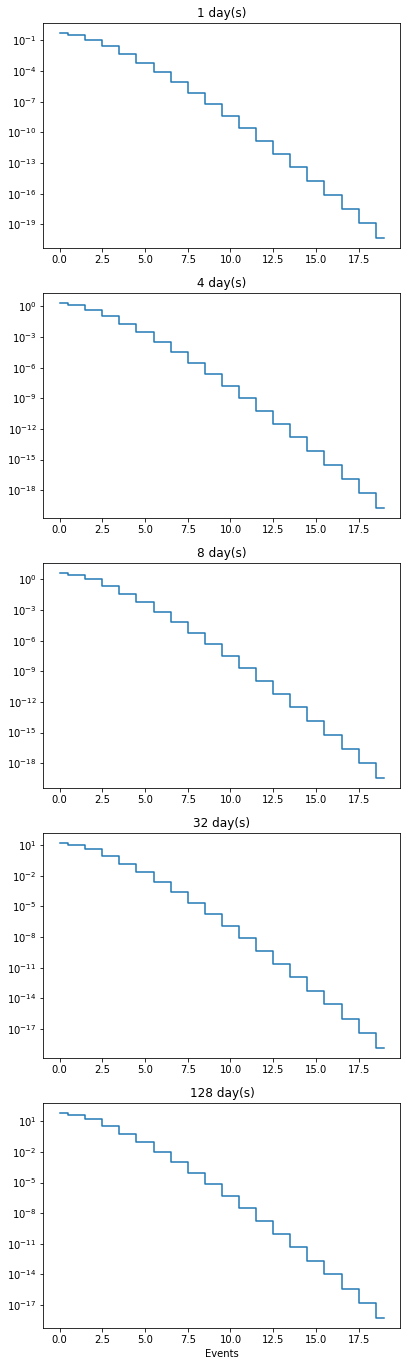

In [3]:
from scipy.stats import poisson
# Several graphs providing different amounts of days.

mu = 0.7                    #Average cosmic background events
signal = 5                  #Hypothetical source
max_events = 20             #Maximum number of events to show
days = [1, 4, 8, 32, 128]   #Days we want to measure for


num_days = len(days)
x_axis = range(0, max_events)
poisson_base = poisson.pmf(x_axis , mu)

# Default figure width, height multiplied by number of days we want to graph
figure = plt.figure(figsize=(6.4, 4.8*num_days))
axes = figure.subplots(num_days, 1)

for idx in range(0, num_days):
    current_poisson = poisson_base * days[idx]
    ax = axes[idx]
    ax.set_yscale('log')
    ax.set_title(str(days[idx]) + ' day(s)')
    ax.step(x_axis, current_poisson, where='mid')
    
ax.set_xlabel('Events');

### 1B.
Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

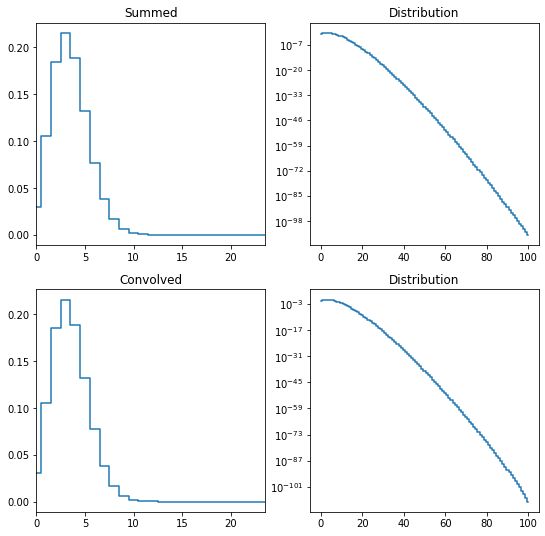

In [6]:
from numpy import convolve
# To show mathematically, we compare the summed distribution with
# Convolving the one day 5 times.

mu = 0.7        #background mean
trials = 5      #number of days prescribed
first_trial_range = 20 #Number of events looked at

#Setup first trial numbers
x1_axis = range(0, first_trial_range + 1)
poisson_1 = poisson.pmf(x1_axis, mu)

#Setup all trials numbers
trials_mu = mu * trials
xtrials_axis = range(0, first_trial_range * trials + 1)

#new distrutions
summed_distribution = poisson.pmf(xtrials_axis, trials_mu)

convolved_distribution = convolve(poisson_1, poisson_1)
for _idx in range(2, trials):
    convolved_distribution = convolve(convolved_distribution, poisson_1)

figure = plt.figure(figsize=(9, 9))

ax = figure.add_subplot(2, 2, 1)
ax.set_title('Summed')
ax.set_xlim([0, trials_mu + 20])
ax.step(xtrials_axis, summed_distribution, where='mid')

ax = figure.add_subplot(2, 2, 2)
ax.set_title('Distribution')
ax.set_yscale('log')
ax.step(xtrials_axis, summed_distribution, where='mid')

ax = figure.add_subplot(2, 2, 3)
ax.set_title('Convolved')
ax.set_xlim([0, trials_mu + 20])
ax.step(xtrials_axis, convolved_distribution, where='mid')

ax = figure.add_subplot(2, 2, 4)
ax.set_title('Distribution')
ax.set_yscale('log')
ax.step(xtrials_axis, convolved_distribution, where='mid');

Both my summed distribution and my convolved distribution look identical. This is because conceptually, we are looking at the same background with the same average event 5 times in a row, which can be shown either as simple multiplication of the mean, or as a convolution of the mean. They are identical operations to make, it is simply semantics.

### 1C.

Show how the probability distribution evolves as you *average* days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.

In [66]:
x = np.arange(0, 21)
px = poisson.pmf(x, 0.7)
p2 = np.convolve(px, px)
x2 = np.arange(0, 41)
x2_average = x2/2

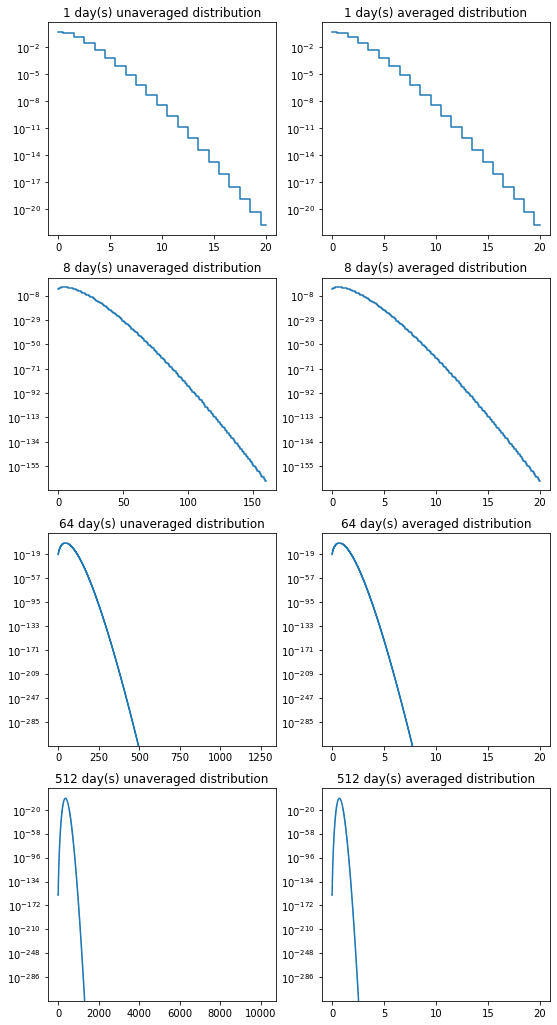

In [70]:
# I shall show the probability distribution for 1 day, 4 days, 
# 32 days, and 128 days

mu = 0.7                  # background mean
base_range = 20           # Number of events looked at
days = [1, 8, 64, 512]    # Days to investigate

num_days = len(days)
figure = plt.figure(figsize=[9, 4.5 * num_days])
axes = figure.subplots(num_days, 2)

for idx in range(0, num_days):
    #Construct the averaged distribution
    current_x = np.arange(0, base_range * days[idx] + 1)
    current_mu = mu * days[idx]
    current_poisson = poisson.pmf(current_x, current_mu)
    avg_x = current_x / days[idx]
    
    ax1 = axes[idx, 0]
    ax2 = axes[idx, 1]
    
    ax1.set_title(str(days[idx]) + ' day(s) unaveraged distribution')
    ax1.set_yscale('log')
    ax1.step(current_x, current_poisson, where='mid')
    
    ax2.set_title(str(days[idx]) + ' day(s) averaged distribution')
    ax2.set_yscale('log')
    ax2.step(avg_x, current_poisson, where='mid')

As can be seen, the averaged graphs tend to have sharper drop offs, looking more and more gaussian in nature. This agrees with the central limit theroem which says that the average of any sufficiently large distribution tends to become gaussian, and that when we average our distribution we lose our poisson distribution shape.

### 1D.

Pick some number of days N, and assume you saw Y * N gamma rays from your source. Calculate the 'sigma' of your observation.

In [12]:
signal = 5
days = 10

mu_days = mu * days
measurement = signal * days

probability = poisson.cdf(measurement, mu_days)
sigma = norm.ppf(probability)
print(sigma)

# I suspect there is a little to much rounding happening for my probability,
# unsure of how to fix that though. This is the idea we are shooting for

inf


## Problem 2

Pick a skewed continuous distribution, such as a Rayleigh, that describes your background over some observing interval

### 2A.

Show how the distribution changes as you average over more observing intervals.

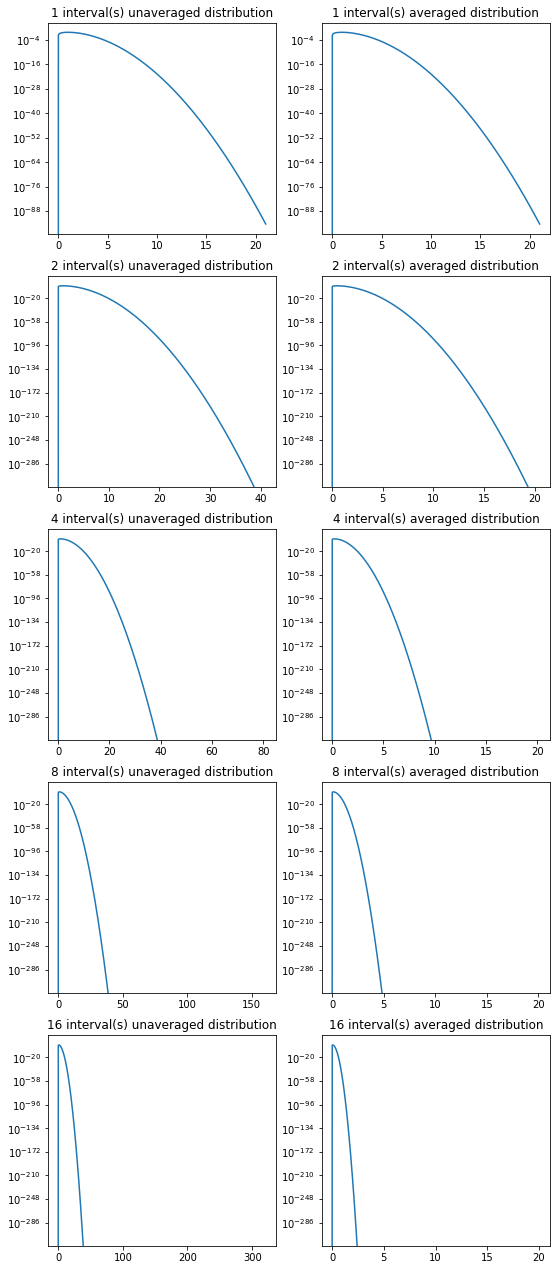

In [14]:
from scipy.stats import rayleigh

base_x_max = 20
trial_intervals = [1, 2, 4, 8, 16]

num_intervals = len(trial_intervals)
fig = plt.figure(figsize=[9, 4.5*num_intervals]) # 4.5x4.5 square plots
axes = fig.subplots(num_intervals, 2)

for idx in range(0, num_intervals):
    x = np.arange(0, base_x_max * trial_intervals[idx] + 1, 0.01)
    r_distribution = rayleigh.pdf(x)
    avg_x = x / trial_intervals[idx]
    ax1 = axes[idx, 0]
    ax2 = axes[idx, 1]
    
    ax1.set_title(str(trial_intervals[idx]) + ' interval(s) unaveraged distribution')
    ax1.set_yscale('log')
    ax1.plot(x, r_distribution)
    
    ax2.set_title(str(trial_intervals[idx]) + ' interval(s) averaged distribution')
    ax2.set_yscale('log')
    ax2.plot(avg_x, r_distribution)
    

### 2B.

Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

The shape becomes closer to a parabola, looking more and more symmetric on either side of the high point. It is continuing to approach a gaussian distribution at 16 averaged intervals.

## Problem 3

### Version 1

From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

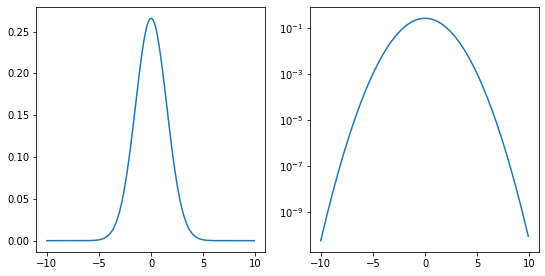

In [25]:
# Pick some values
width = 1.5 # Default normal distribution is 1
signal = 5.4

# Now we create some axes for our gaussian

x = np.arange(-10, 10, 0.1) 
distribution = norm.pdf(x, scale=width)

figure = plt.figure(figsize=[9, 4.5])
ax = figure.subplots(1, 2)
ax[0].plot(x, distribution)

ax[1].set_yscale('log')
ax[1].plot(x, distribution);

In [26]:
# Calculate signal sigma

percentile = norm.cdf(signal, scale=width)
sigma = norm.ppf(percentile)

print('The sigma of the signal ' + str(signal) + ' is ' + str(sigma))

The sigma of the signal 5.4 is 3.599999999999969


The sigma of my signal is 3.59, so it can not be claimed as a discovery.

### Version 2

#### 3B

If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (*Clearly* state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

We want to know for a gaussian background distribution with a width of 1.5 what the probability distribution looks like over 10000 trials. In other words, we need to find the 10000th summed distribution.

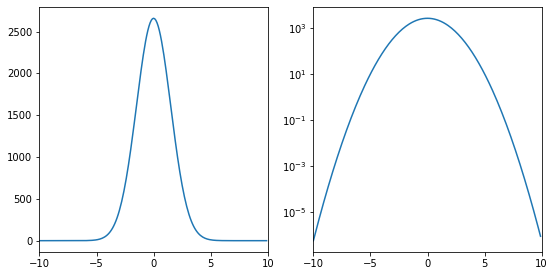

In [27]:
from numpy import convolve
# find summed distribution
pixels = 10000

summed_distribution = norm.pdf(x, scale=width) * pixels

figure = plt.figure(figsize=[9, 4.5])
ax = figure.subplots(1, 2)
ax[0].set_xlim([-10, 10])
ax[0].plot(x, summed_distribution)

ax[1].set_yscale('log')
ax[1].set_xlim([-10, 10])
ax[1].plot(x, summed_distribution);

#### 3C

Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [28]:
# To calculate, we need to convert signal to the new distribution

percentile = norm.cdf(signal / pixels, scale=width)
sigma = norm.ppf(percentile) * pixels
print('The sigma of my signal is: ' + str(sigma))

The sigma of my signal is: 3.5999999999999592


## Problem 4

For the same Gaussian as above:

### 4A.

Calculate the signal required for a 5-sigma detection in version 1

In [29]:
prob5sigma = 1/3.5e6

detection1 = norm.ppf(1 - prob5sigma, scale=width) # makes detection positive
print(detection1)

7.500947152395572


### 4B.

Calculate the signal required for a 5-sigma detection in Version 2

In [30]:
detection2 = norm.ppf(1 - prob5sigma / pixels, scale=width)
print(detection2)

9.82653959107738


### 4C.

Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [23]:
additional_brightness = detection2 - detection1
print(additional_brightness)

2.3255924386818076


Looking at the probability distributions, we see that both these distributions have their 5 sigma events well into the tails of the background. So even though it is linearly much higher for all the pixels, it is exponentially not that much more. This makes the distribution very forgiving for the additional data points.

### 4D.

If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [25]:
new_pixels = pixels**2 # lets square the number of trials
detection3 = norm.ppf(1 - prob5sigma / new_pixels, scale=width)
print(detection3)
print(detection3 - detection2)

11.713211245377284
1.8866716542999047


The change for 100 million pixels from 10 thousand pixels is only 1.887 additional brightness for 5 sigma detection.